# Continuación del entrenamiento del modelo tuneable


En este notebook se procede de la misma manera que en el notebook 3 para continuar el entrenamiento del modelo optimizado del notebook 4 durante un número de epochs igual al que se entrenaron los modelos simple y aumentado. </br>

Se realizan los mismos pasos que siempre:


In [1]:
import sys

sys.path.append("../")  # Add the parent directory to the Python path

In [2]:
from src.data.data_loader import data_loader, data_loader_test
from src.models.train import ModelTrainer, ModelConfiguration
from src.models.evaluator import ModelEvaluator
from IPython.display import Image

## Carga de datos de entrenamiento


In [ ]:
train_data, val_data = data_loader("../data/train", (150, 150), batch_size=128)

## Entreamiento del modelo optimizado


In [ ]:
aumented_tuned_model = ModelTrainer("aumented_tuned", ModelConfiguration.TUNABLE, 6)

In [ ]:
aumented_tuned_model.train(train_data, val_data, epochs=25)

- Gráfica azul: Modelo simple
- Gráfica azul oscuro: Modelo aumentado
- Gráfica naranja: Modelo aumentado entrenado completamente


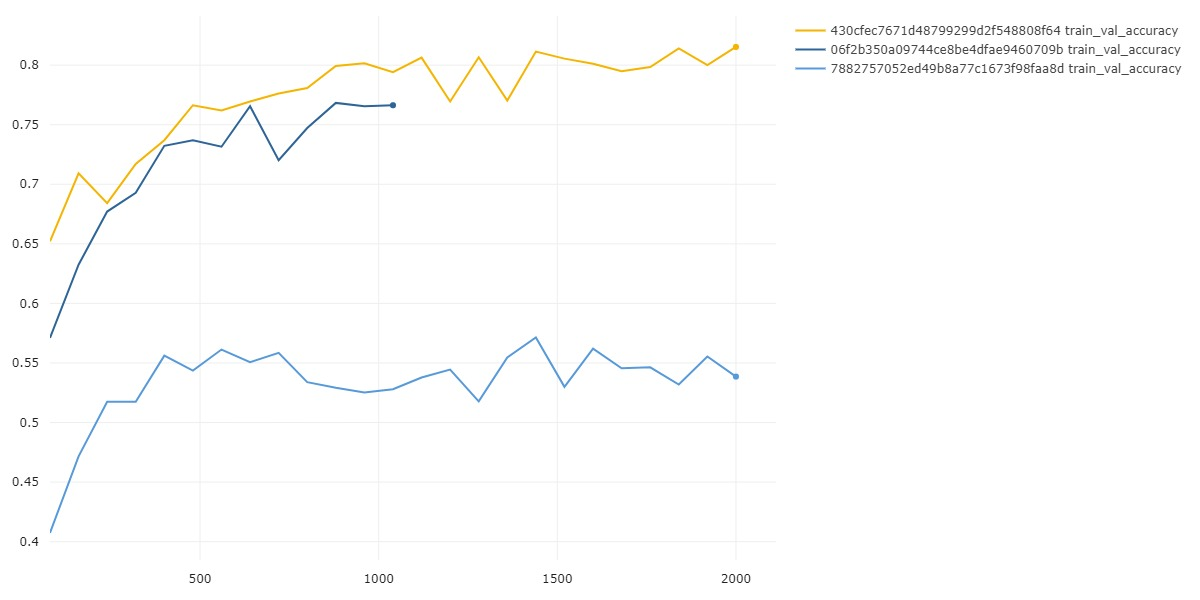

In [24]:
imagen_ruta = "../images/hp_train_val_accuracy_VS_step.jpeg"

Image(filename=imagen_ruta)

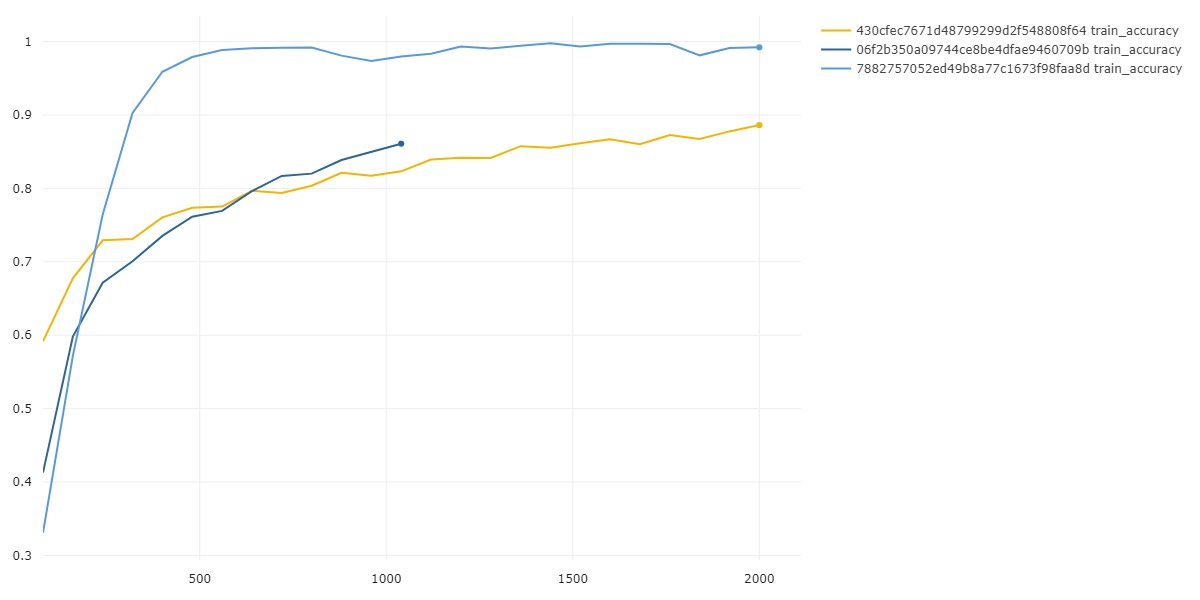

In [25]:
imagen_ruta2 = "../images/hp_train_accuracy_VS_step.jpeg"

Image(filename=imagen_ruta2)

De los resultados de las gráficas se extrae que el nuevo modelo pudo entrenarse durante más epochs antes de un early stopping que el modelo aumentado Esto se debe a que su precisión sobre el set de entrenamiento subió a la vez que en el de validación durante todas las epochs.

En el caso del modelo aumentado sin optimizar, la precisión en el set de train siempre subio, a pesar de que en cierto punto la precisión en el set de validación dejo de hacerlo. Esto se interpreta como overfitting.

Por tanto, se tiene una primera impresión de que el modelo con los hiperparámetros optimizados es superior.


## Test del modelo aumentado optimizado


In [3]:
SAVED_MODEL_ROUTE = "../models/aumented_tuned_trained"
test_data = data_loader_test("../data/test", (150, 150))

Found 4257 files belonging to 6 classes.


In [4]:
model_evaluator = ModelEvaluator(SAVED_MODEL_ROUTE)

In [5]:
model_evaluator.evaluate(test_data)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorboard, tensorflow.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\pablo\\Documents\\Master\\Modulo_8\\notebooks' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/pablotorresr/modulo8/f2b4568abdcf44cf943594502f99d5e2



134/134 [==============================] - 9s 65ms/step - loss: 0.7177 - accuracy: 0.8208


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/pablotorresr/modulo8/f2b4568abdcf44cf943594502f99d5e2
COMET INFO:   Metrics:
COMET INFO:     test_accuracy : 0.8207657933235168
COMET INFO:     test_loss     : 0.7176865935325623
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get all dat

Para el set de test, se obtiene finalmente una métrica de precisión de `0.8208`, que es superior al 0.7782 del modelo sin optimizar
